# Physical Activity Recognition through Analysis of Wearable Sensor Data

The primary objective of this project is to create an accurate, robust, and efficient predictive model that is able to identify specific physical activities performed by a user using sensor data acquired from the PAMAP2 Physical Activity Monitoring dataset gathered from wearable devices.

Given the recent growth of the use of these devices, such as Apple Watch, this project has the potential to aid in the enhancement of personalized healthcare and fitness routine management.

Author: Michael Bai

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('dataset.csv')

In [ ]:
df.head()

,activityID,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,...,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,PeopleId
0,transient activities,104.0,30.0,2.37223,8.60074,3.51048,-0.092217,0.056812,-0.015845,14.6806,...,9.65918,-1.65569,-0.099797,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1
1,transient activities,104.0,30.0,2.18837,8.56560,3.66179,-0.024413,0.047759,0.006474,14.8991,...,9.69370,-1.57902,-0.215687,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1
2,transient activities,104.0,30.0,2.37357,8.60107,3.54898,-0.057976,0.032574,-0.006988,14.2420,...,9.58944,-1.73276,0.092914,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1
3,transient activities,104.0,30.0,2.07473,8.52853,3.66021,-0.002352,0.032810,-0.003747,14.8908,...,9.58814,-1.77040,0.054545,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1
4,transient activities,104.0,30.0,2.22936,8.83122,3.70000,0.012269,0.018305,-0.053325,15.5612,...,9.69771,-1.65625,-0.060809,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1


## Check for Missing Values

In [ ]:
# check for missing values
print('The number of missing values per feature are as follows:')
print(df.isnull().sum())
print()

# check for some common filler values
filler_values = ['N/A', 'unknown', '???', 'NA', 'NaN', 0]
for filler in filler_values:
    print(f'The number of values with filler value {filler} are as follows: ')
    print(df.eq(filler).sum())
    print()

The number of missing values per feature are as follows:
activityID                    0
heart_rate                   46
hand temperature (°C)         0
hand acceleration X ±16g      0
hand acceleration Y ±16g      0
hand acceleration Z ±16g      0
hand gyroscope X              0
hand gyroscope Y              0
hand gyroscope Z              0
hand magnetometer X           0
hand magnetometer Y           0
hand magnetometer Z           0
chest temperature (°C)        0
chest acceleration X ±16g     0
chest acceleration Y ±16g     0
chest acceleration Z ±16g     0
chest gyroscope X             0
chest gyroscope Y             0
chest gyroscope Z             0
chest magnetometer X          0
chest magnetometer Y          0
chest magnetometer Z          0
ankle temperature (°C)        0
ankle acceleration X ±16g     0
ankle acceleration Y ±16g     0
ankle acceleration Z ±16g     0
ankle gyroscope X             0
ankle gyroscope Y             0
ankle gyroscope Z             0
ankle magnetome

Missing data analysis was performed on the dataset yielding 46 values missing for “heart_rate” out of 2,864,056 records, indicating that a vast majority of the data is present. The readme.md file, provided by the dataset upon download, indicates that the missing data is due to minor malfunctions in the heart rate sensor caused by wireless disconnections.

However, upon analysis of the missing records, all 46 are marked under ‘transient activities’, indicating that the data is missing not at random. Despite the observation, this may not actually be influential since only 46 records out of over 800,000 records for ‘transient activities’ are missing. Considering the fact that ‘transient activities’ are over-represented in our dataset, these missing values are less than surprising.

There are no other missing values, nor common missing-number placeholders such as ‘NaN’, ‘???’, 0, ‘unknown’, etc… for any other feature.


## Exploratory Data Analysis

In [ ]:
# understanding of summative statistics for each feature.
df.describe()

,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,hand magnetometer Y,...,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,PeopleId
count,2.864010e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,...,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06
mean,1.097703e+02,3.267050e+01,-4.978788e+00,3.575225e+00,3.174904e+00,-3.881062e-03,3.213164e-02,-6.985945e-03,2.125344e+01,-1.432121e+01,...,9.547292e+00,-1.251156e-01,-2.459224e+00,8.153172e-03,-3.430653e-02,6.899129e-03,-3.272317e+01,1.635810e+00,1.691927e+01,4.487160e+00
std,2.583130e+01,1.800771e+00,5.989589e+00,6.260608e+00,3.828842e+00,1.298024e+00,8.842820e-01,1.453340e+00,2.402693e+01,2.409430e+01,...,5.674253e+00,6.816935e+00,3.523211e+00,1.070971e+00,5.953280e-01,1.842663e+00,1.888977e+01,2.159774e+01,2.031745e+01,2.357792e+00
min,5.700000e+01,2.743750e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-2.780440e+01,-2.221270e+01,-1.669970e+01,-1.039410e+02,-2.000430e+02,...,-1.550680e+02,-1.574430e+02,-1.589260e+02,-2.399500e+01,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.092890e+02,1.000000e+00
25%,9.000000e+01,3.143750e+01,-9.038570e+00,1.294029e+00,9.735957e-01,-3.477418e-01,-1.970635e-01,-3.028935e-01,5.345607e+00,-2.951722e+01,...,9.030297e+00,-1.756760e+00,-3.643863e+00,-1.528980e-01,-8.216113e-02,-3.097942e-01,-4.290010e+01,-1.140080e+01,3.293130e+00,2.000000e+00
50%,1.080000e+02,3.312500e+01,-5.818260e+00,3.568640e+00,2.961145e+00,-6.158165e-03,6.137100e-03,-5.385480e-03,2.428385e+01,-1.645440e+01,...,9.573050e+00,-2.717770e-01,-2.357330e+00,4.215460e-03,-4.229060e-03,-2.273390e-03,-3.389515e+01,1.419830e+00,1.816660e+01,5.000000e+00
75%,1.250000e+02,3.400000e+01,-8.020333e-01,6.588192e+00,5.996195e+00,3.030542e-01,2.366580e-01,2.924292e-01,3.925000e+01,1.765928e+00,...,1.000520e+01,1.253742e+00,-1.062060e+00,9.399325e-02,8.283495e-02,6.281400e-02,-1.905550e+01,1.734970e+01,3.091070e+01,7.000000e+00
max,2.020000e+02,3.550000e+01,6.285960e+01,1.556990e+02,1.569490e+02,2.641580e+01,1.698350e+01,1.433840e+01,1.725900e+02,1.211760e+02,...,1.572320e+02,1.572930e+02,1.588720e+02,1.742040e+01,1.358820e+01,1.652880e+01,9.752550e+01,1.233060e+02,1.469000e+02,8.000000e+00


## Detect Outliers (1.5x IQR)

In [ ]:
# check only numerical features
for column in df.select_dtypes(include = [np.number]).columns:

    # calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # filter outliers
    filter_in = (df[column] >= Q1 - 1.5*IQR) & (df[column] <= Q3 + 1.5*IQR)
    outliers = df.loc[~filter_in, column]

    # print outlier count
    print(f"Column '{column}' has {outliers.count()} outliers")

Column 'heart_rate' has 33781 outliers
Column 'hand temperature (°C)' has 8347 outliers
Column 'hand acceleration X ±16g' has 20232 outliers
Column 'hand acceleration Y ±16g' has 176483 outliers
Column 'hand acceleration Z ±16g' has 51951 outliers
Column 'hand gyroscope X' has 505302 outliers
Column 'hand gyroscope Y' has 523368 outliers
Column 'hand gyroscope Z' has 677605 outliers
Column 'hand magnetometer X' has 18337 outliers
Column 'hand magnetometer Y' has 31867 outliers
Column 'hand magnetometer Z' has 33295 outliers
Column 'chest temperature (°C)' has 8896 outliers
Column 'chest acceleration X ±16g' has 166882 outliers
Column 'chest acceleration Y ±16g' has 464667 outliers
Column 'chest acceleration Z ±16g' has 216368 outliers
Column 'chest gyroscope X' has 442854 outliers
Column 'chest gyroscope Y' has 504882 outliers
Column 'chest gyroscope Z' has 450402 outliers
Column 'chest magnetometer X' has 38052 outliers
Column 'chest magnetometer Y' has 248453 outliers
Column 'chest m

Please note that outliers, in the context of physiological data should not be removed, nor treated as poor data since there is a high natural variability in human physiology and behavior. The data collected may be perfectly valid and incredibly useful. For instance, during intense physical activities like rope jumping, it is perfectly normal for heart rate to reach levels that are very high compared to rest or light activity, and are classified as outliers despite being expected and useful.

This segment is just to illustrate that there exists variability in our data.

## Check for Number of Unique Occurrences

In [ ]:
# check for unique activities
print('The unique activity types are as follows:')
print(df['activityID'].unique())
print()

# check for unique users
print('The unique user IDs are: ')
print(df['PeopleId'].unique())
print()

count_by_people_id = df['PeopleId'].value_counts()
print(count_by_people_id)
print('Relatively even distribution of activities performed by each person')

The unique activity types are as follows:
['transient activities' 'lying' 'sitting' 'standing' 'ironing'
 'vacuum cleaning' 'ascending stairs' 'descending stairs' 'walking'
 'Nordic walking' 'cycling' 'running' 'rope jumping']

The unique user IDs are: 
[1 2 3 4 5 6 7 8]

2    447000
8    408031
1    376417
5    374783
6    361817
4    329576
7    313599
3    252833
Name: PeopleId, dtype: int64
Relatively even distribution of activities performed by each person


Plot activities distribution


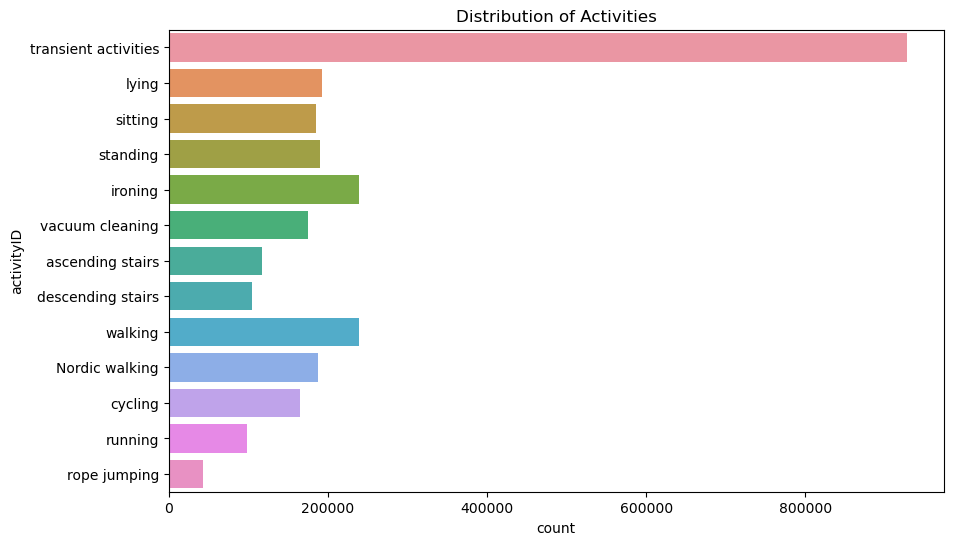

In [ ]:
print('Plot activities distribution')
plt.figure(figsize = (10, 6))
sns.countplot(data = df, y = 'activityID')
plt.title('Distribution of Activities')
plt.show()
print()

In [ ]:
print(f"The proportion of transient activities is: {len(df[df['activityID'] == 'transient activities']) / len(df)}")

The proportion of transient activities is: 0.32386761990687335


This indicates an imbalanced dataset which might bias our model into predicting transient activities more often than not. We can use SMOTE to generate synthetic examples that may oversample the minority, or we can remove said activityID.

Fortunately, in our case, we can remove transient activities since the objective of our model is to classify active activities or exercises. We can ignore those cases in which the person is simply resting, due to the guidelines laid out in our objective.

## Plot Heart Rate Distribution

Plot heart rate distribution


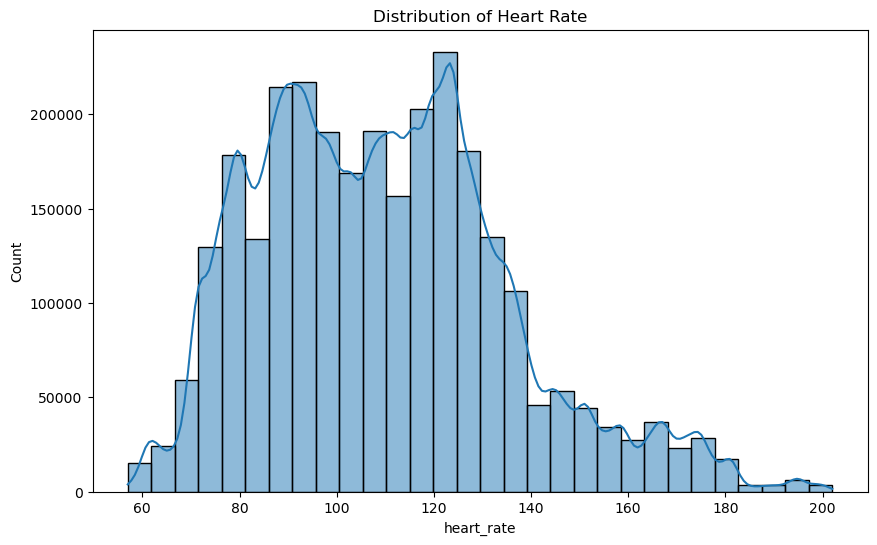

In [ ]:
print('Plot heart rate distribution')
plt.figure(figsize = (10, 6))
sns.histplot(df['heart_rate'], bins = 30, kde = True)
plt.title('Distribution of Heart Rate')
plt.show()

We notice a right-skewed bi-modal distribution with relative peaks at 90 BPM and 125 BPM.
The right-skewed nature of our distribution is also not surprising as the left-most part of the curve around 60 to 80 BPM represents one's baseline resting heart rate. When one's body responds to exercise, the heart rate increases to the 'target heart rate', which is around 160 to 200 BPM.

Display Box Plot of Heart Rate


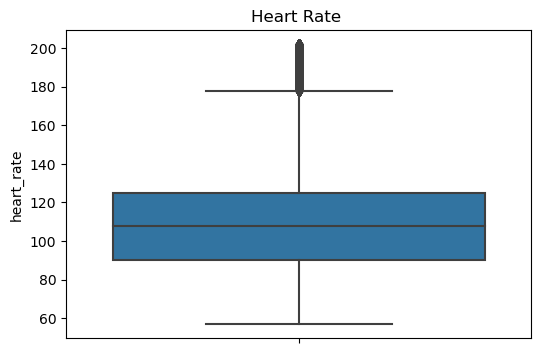

In [ ]:
print('Display Box Plot of Heart Rate')
fig, ax = plt.subplots(figsize=(6,4))
plt.title("Heart Rate ")
ax = sns.boxplot(y = df["heart_rate"])

We notice that there is a dense group of outliers which have a heart rate from 180 to just over 200. Outliers, in the context of physiological data should not be removed, nor treated as poor data since there is a high natural variability in human physiology and behavior. The data collected may be perfectly valid and incredibly useful. For instance, during intense physical activities like running or rope jumping, it is perfectly normal for heart rate to reach levels that are very high compared to rest or light activity, and are classified as outliers despite being expected and useful.

The median heart rate is about 109 BPM, with the first quartile (25% percentile) ~ 90 BPM and the third quartile (75% percentile) ~ 125 BPM.
The whisker from the third quartile to the upper range of the 1.5 * IQR indicates higher variability in the upper part of the distribution of the data, which is normal as intensive physical exercises demand a higher heart rate.

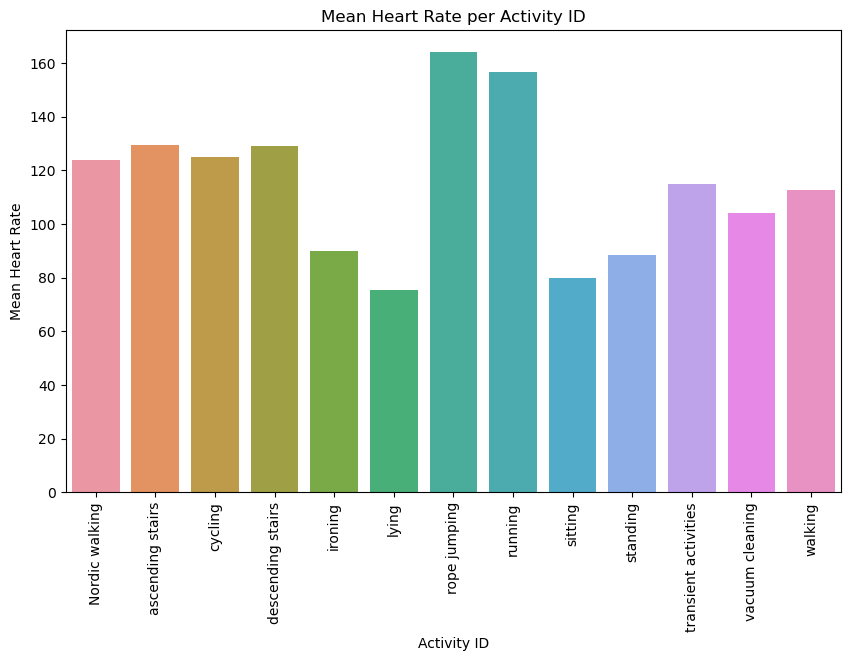

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# calculate mean heart_rate for each activityID
mean_hr_per_activity = df.groupby('activityID')['heart_rate'].mean()

# bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x = mean_hr_per_activity.index, y = mean_hr_per_activity.values)

plt.xlabel('Activity ID')
plt.ylabel('Mean Heart Rate')
plt.title('Mean Heart Rate per Activity ID')
plt.xticks(rotation=90)
plt.show()

A simple Student's T-test will be used to test the following hypotheses:

H0: Mean HR of rope jumping and running is not significantly different from the mean of the other activities.
HA: Mean HR of rope jumping and running is significantly different from the mean of the other activities.

This is to explore whether or not there exists certain exercises that cause mean heart rate to be significantly different from the mean heart rate of other exercises.
The results of this t-test may indicate the extent to which heart rate is a good feature for classification.

In [ ]:
from scipy import stats

high_intensity_activities = df[df['activityID'].isin(['rope jumping', 'running'])]['heart_rate']
other_activities = df[~df['activityID'].isin(['rope jumping', 'running'])]['heart_rate']

t_statistic, p_value = stats.ttest_ind(high_intensity_activities, other_activities, equal_var = False, nan_policy = 'omit')

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 824.670362223388
p-value: 0.0


There is overwhelming support that indicates that mean heart rate between rope jumping and running is indeed significantly different from the mean of the other activities.

## Feature Engineering

The magnitudes of acceleration, gyroscope, and magnetometer are calculated and used as features for the model from their X, Y, and Z axis components. This is done to reduce the dimensionality of the dataset, as well as create features that still represent the nature of our dataset, perhaps even better than the features separately.

In [ ]:
import numpy as np

df['hand_acceleration_magnitude'] = np.sqrt(df['hand acceleration X ±16g']**2 + df['hand acceleration Y ±16g']**2 + df['hand acceleration Z ±16g']**2)

df['hand_gyroscope_magnitude'] = np.sqrt(df['hand gyroscope X']**2 + df['hand gyroscope Y']**2 + df['hand gyroscope Z']**2)

df['hand_magnetometer_magnitude'] = np.sqrt(df['hand magnetometer X']**2 + df['hand magnetometer Y']**2 + df['hand magnetometer Z']**2)

df['chest_acceleration_magnitude'] = np.sqrt(df['chest acceleration X ±16g']**2 + df['chest acceleration Y ±16g']**2 + df['chest acceleration Z ±16g']**2)

df['chest_gyroscope_magnitude'] = np.sqrt(df['chest gyroscope X']**2 + df['chest gyroscope Y']**2 + df['chest gyroscope Z']**2)

df['chest_magnetometer_magnitude'] = np.sqrt(df['chest magnetometer X']**2 + df['chest magnetometer Y']**2 + df['chest magnetometer Z']**2)

df['ankle_acceleration_magnitude'] = np.sqrt(df['ankle acceleration X ±16g']**2 + df['ankle acceleration Y ±16g']**2 + df['ankle acceleration Z ±16g']**2)

df['ankle_gyroscope_magnitude'] = np.sqrt(df['ankle gyroscope X']**2 + df['ankle gyroscope Y']**2 + df['ankle gyroscope Z']**2)

df['ankle_magnetometer_magnitude'] = np.sqrt(df['ankle magnetometer X']**2 + df['ankle magnetometer Y']**2 + df['ankle magnetometer Z']**2)


Drop component features as previously discussed. In addition, drop PeopleId.

PeopleId refers to the person who performed the exercise and can be helpful for the model to learn more about the habits, patterns, and performance trends of an individual person, and use that information to better predict other activities performed by that person. While this feature is potentially amazing for device such as the Apple Watch, that work to only serve and analyze the user in particular, for the purposes of our multi-class classification model, the model should not draw influence from the person performing the exercise, simply the physiological measurements of said person.

In [ ]:
# dropping original X, Y, Z features
features_to_drop = ['PeopleId', 'hand acceleration X ±16g', 'hand acceleration Y ±16g', 'hand acceleration Z ±16g',
                    'hand gyroscope X', 'hand gyroscope Y', 'hand gyroscope Z',
                    'hand magnetometer X', 'hand magnetometer Y', 'hand magnetometer Z',
                    'chest acceleration X ±16g', 'chest acceleration Y ±16g', 'chest acceleration Z ±16g',
                    'chest gyroscope X', 'chest gyroscope Y', 'chest gyroscope Z',
                    'chest magnetometer X', 'chest magnetometer Y', 'chest magnetometer Z',
                    'ankle acceleration X ±16g', 'ankle acceleration Y ±16g', 'ankle acceleration Z ±16g',
                    'ankle gyroscope X', 'ankle gyroscope Y', 'ankle gyroscope Z',
                    'ankle magnetometer X', 'ankle magnetometer Y', 'ankle magnetometer Z']

df = df.drop(features_to_drop, axis=1)

## Pre-processing and Model Building

In [ ]:
# FOR XGBOOST AND RANDOM FOREST FOR PRE-PROCESSING

import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = df[df['activityID'] != 'transient activities'] # remove transient activities

# convert categorical variables (
le = LabelEncoder()
df['activityID'] = le.fit_transform(df['activityID'])

# split the features and the target variable
X = df.drop(columns='activityID')
y = df['activityID']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state = 1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier Results:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# XGBoost Classifier
xgb = XGBClassifier(eval_metric='mlogloss', random_state = 1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Classifier Results:")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

Random Forest Classifier Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56413
           1       1.00      1.00      1.00     35213
           2       1.00      1.00      1.00     49403
           3       1.00      1.00      1.00     31672
           4       1.00      1.00      1.00     71455
           5       1.00      1.00      1.00     57909
           6       1.00      1.00      1.00     12827
           7       1.00      1.00      1.00     29422
           8       1.00      1.00      1.00     55843
           9       1.00      1.00      1.00     56907
          10       1.00      1.00      1.00     52233
          11       1.00      1.00      1.00     71648

    accuracy                           1.00    580945
   macro avg       1.00      1.00      1.00    580945
weighted avg       1.00      1.00      1.00    580945

[[56413     0     0     0     0     0     0     0     0     0     0     0]
 [    0 35148     0    6

In [ ]:
from sklearn.metrics import f1_score

micro_f1 = f1_score(y_test, y_pred_rf, average='micro')
print("Random Forest Micro-average F1 score: {0:.2f}".format(micro_f1))

macro_f1 = f1_score(y_test, y_pred_rf, average='macro')
print("Random Forest Macro-average F1 score: {0:.2f}".format(macro_f1))

micro_f1 = f1_score(y_test, y_pred_xgb, average='micro')
print("XGB Micro-average F1 score: {0:.2f}".format(micro_f1))

macro_f1 = f1_score(y_test, y_pred_xgb, average='macro')
print("XGB Macro-average F1 score: {0:.2f}".format(macro_f1))

Random Forest Micro-average F1 score: 1.00
Random Forest Macro-average F1 score: 1.00
XGB Micro-average F1 score: 1.00
XGB Macro-average F1 score: 1.00


In [ ]:
importances = xgb.feature_importances_

# print feature importances
for i in range(len(importances)):
    print(f"Feature {X_train.columns[i]}: {importances[i]}")

Feature heart_rate: 0.12244754284620285
Feature hand temperature (°C): 0.08572602272033691
Feature chest temperature (°C): 0.08635687083005905
Feature ankle temperature (°C): 0.0673007071018219
Feature hand_acceleration_magnitude: 0.011064968071877956
Feature hand_gyroscope_magnitude: 0.17790327966213226
Feature hand_magnetometer_magnitude: 0.02000712789595127
Feature chest_acceleration_magnitude: 0.028900451958179474
Feature chest_gyroscope_magnitude: 0.027333270758390427
Feature chest_magnetometer_magnitude: 0.17441120743751526
Feature ankle_acceleration_magnitude: 0.01593092642724514
Feature ankle_gyroscope_magnitude: 0.10362830013036728
Feature ankle_magnetometer_magnitude: 0.07898934185504913


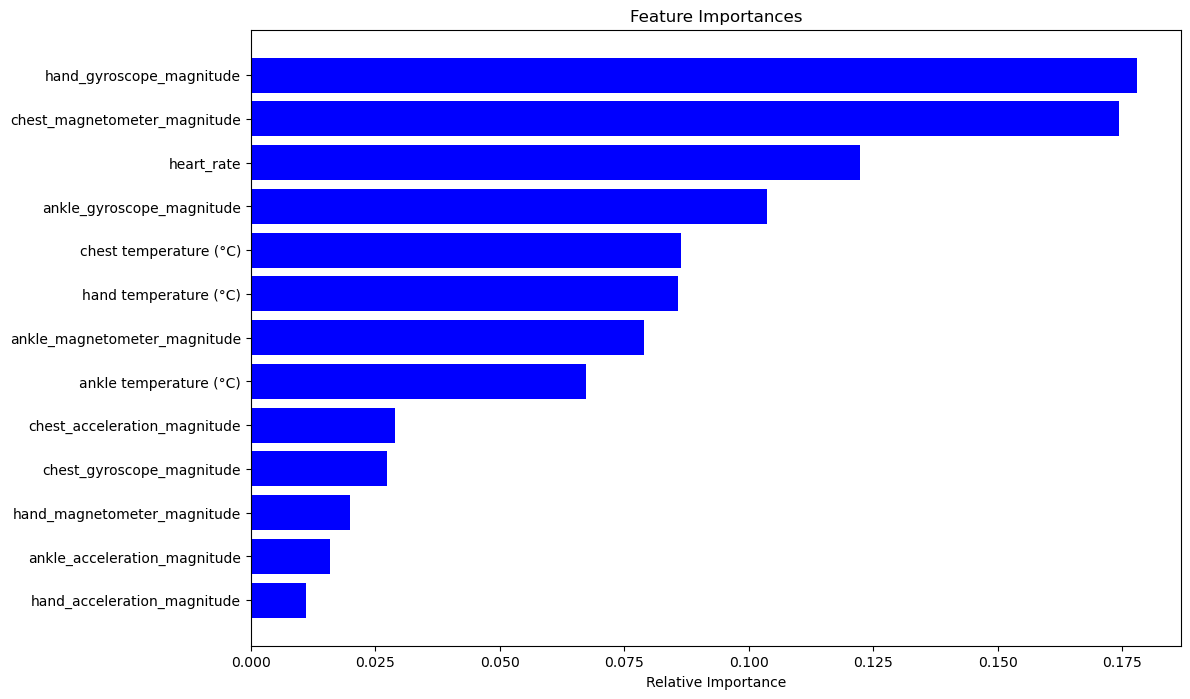

In [ ]:
import matplotlib.pyplot as plt

indices = np.argsort(importances)

plt.figure(figsize=(12,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()